In [1]:
import math
import matplotlib.pyplot as plt

SR_PC = []
SR_EK=[]
TAU=[]
V_all=[]
V_a=[]
X_all = []

In [2]:
"""Исходные данные"""
m = 0.01 # в киллограммах
l = 0.1 # в метрах
g = 9.81 # м/c
tau = 0.0001 #с (тау)
N = int(10/tau) #количество измерений (по тау)

TAU.append(tau)

In [3]:
"""Начальные условия"""
x_0 = 0
v_0 = 0

In [4]:
def energy(x,v):
    return m*(l**2)*((v**2)/2 + g*(1-math.cos(x))/l)

def func(x):
    return -g*math.sin(x)/l

def draw(X,Y):
    plt.xlabel("x") 
    plt.ylabel("T")
    plt.grid()
    plt.minorticks_on()
    plt.grid(which='minor',color = 'black', linestyle = ':')
    plt.plot(X,Y)
    
time=[]
method=[]


# метод Эйлера

In [5]:
"""
V = [v_0]
X = [x_0]
T = [0]
E = [energy(x_0,v_0)]
for i in range(N):
    v = V[-1]
    x = X[-1]
    t = T[-1]
    V.append(v + tau * func(x))
    X.append(x + tau * v)
    T.append(t + tau)
    E.append(energy(X[-1],V[-1]))
draw(T,E)
time.append(T)
method.append(E)
print('max E={}, min E={}'.format(max(E),min(E)))
"""

"\nV = [v_0]\nX = [x_0]\nT = [0]\nE = [energy(x_0,v_0)]\nfor i in range(N):\n    v = V[-1]\n    x = X[-1]\n    t = T[-1]\n    V.append(v + tau * func(x))\n    X.append(x + tau * v)\n    T.append(t + tau)\n    E.append(energy(X[-1],V[-1]))\ndraw(T,E)\ntime.append(T)\nmethod.append(E)\nprint('max E={}, min E={}'.format(max(E),min(E)))\n"

# метод Эйлера-Кромера

In [6]:
"""
V = [v_0]
X = [x_0]
T = [0]
E = [energy(x_0,v_0)]
for i in range(N):
    v = V[-1]
    x = X[-1]
    t = T[-1]
    V.append(v + tau * func(x))
    X.append(x + tau * V[-1])
    T.append(t + tau)
    E.append(energy(X[-1],V[-1]))
draw(T,E)
time.append(T)
method.append(E)
print('max E={}, min E={}'.format(max(E),min(E)))
SR_EK.append(max(E)-((min(E)+max(E))/2))
"""

"\nV = [v_0]\nX = [x_0]\nT = [0]\nE = [energy(x_0,v_0)]\nfor i in range(N):\n    v = V[-1]\n    x = X[-1]\n    t = T[-1]\n    V.append(v + tau * func(x))\n    X.append(x + tau * V[-1])\n    T.append(t + tau)\n    E.append(energy(X[-1],V[-1]))\ndraw(T,E)\ntime.append(T)\nmethod.append(E)\nprint('max E={}, min E={}'.format(max(E),min(E)))\nSR_EK.append(max(E)-((min(E)+max(E))/2))\n"

# метод "предиктор-корректор"

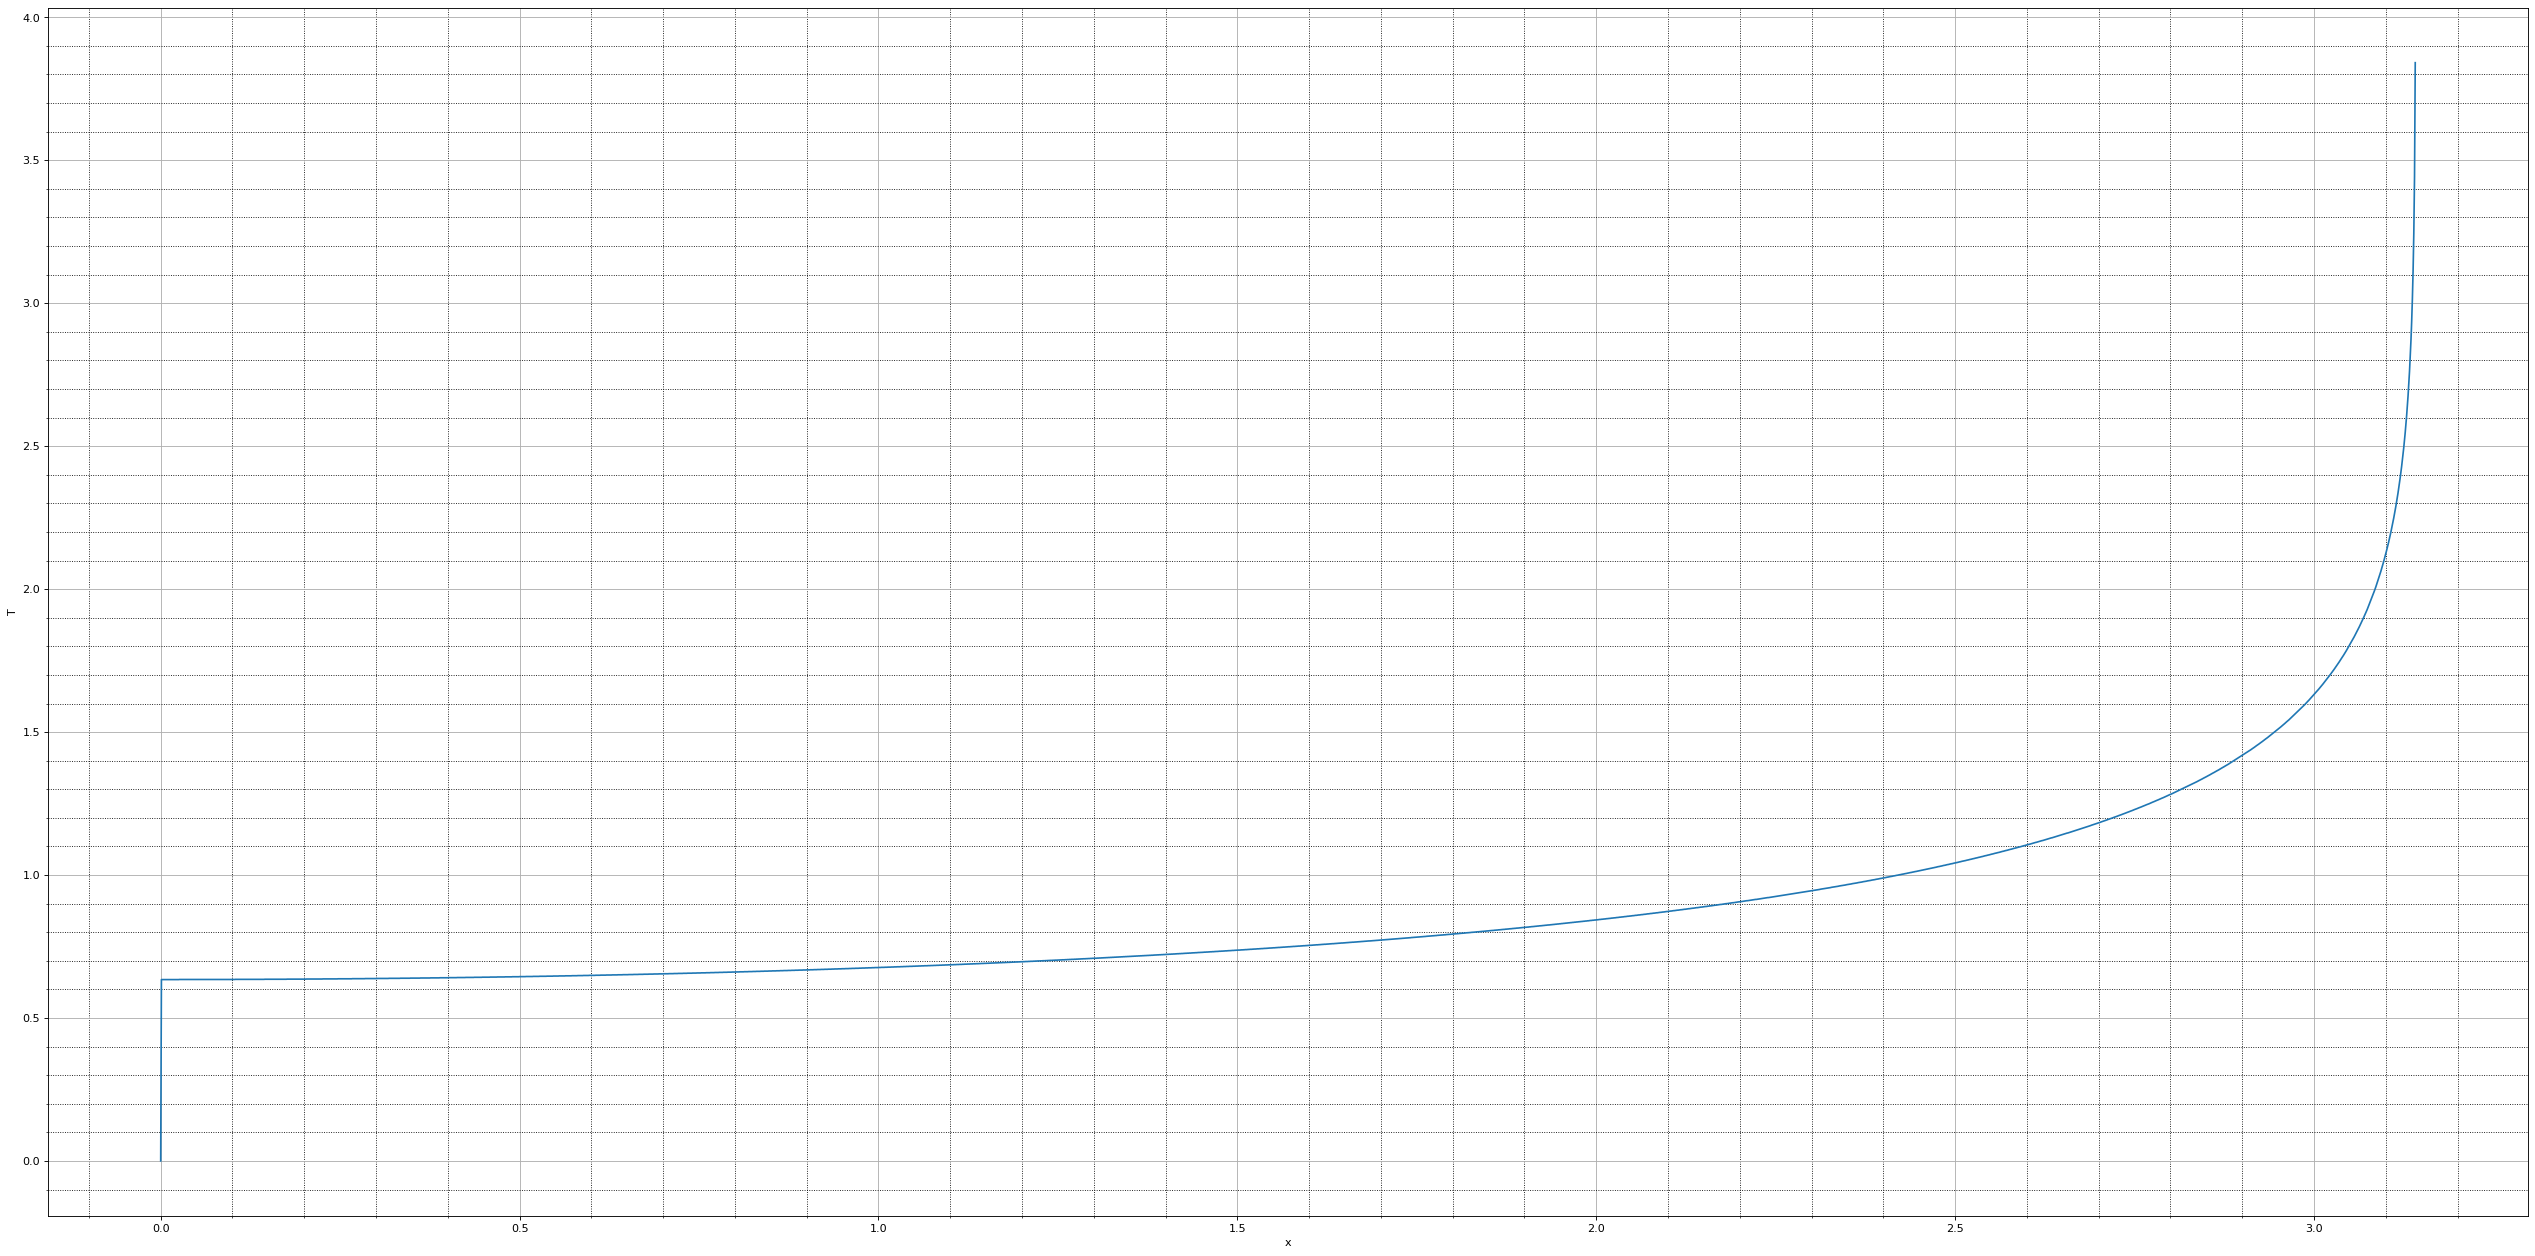

In [7]:
import decimal 

def float_range(start, stop, step):
  while start < stop:
    yield float(start)
    start += decimal.Decimal(step)

X_0 = list(float_range(0, math.pi, "0.001")) 
T_0 = []
v_0 = 0
#X_0 = [0.1]
    
for x_0 in X_0:
    #print('{}, '.format(x_0),end='')
    V = [v_0]
    X = [x_0]
    T = [0]
    E = [energy(x_0,v_0)]
    v = V[-1]
    x = X[-1]
    t = T[-1]
    v_= v + tau * func(x)
    x_= x + tau * v
    V.append(v + tau * (func(x) + func(x_)) / 2)
    X.append(x + tau * (v + v_) / 2)
    T.append(t + tau)
    while X[-1] > 0:
        v = V[-1]
        x = X[-1]
        t = T[-1]
        v_= v + tau * func(x)
        x_= x + tau * v
        V.append(v + tau * (func(x) + func(x_)) / 2)
        X.append(x + tau * (v + v_) / 2)
        T.append(t + tau)
    T_0.append(T[-1]*4)
fig=plt.figure(figsize=(40, 20), dpi= 80, facecolor='w', edgecolor='k')    
draw(X_0,T_0)
